In [1]:
import pandas as pd

df = pd.read_csv('c:/data/time/nile.csv')
df

,x
0,1120
1,1160
2,963
3,1210
4,1160
...,...
95,746
96,919
97,718
98,714


<AxesSubplot:>

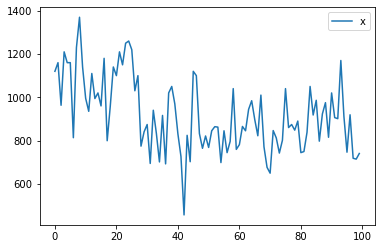

In [2]:
%matplotlib inline
df.plot()

<AxesSubplot:>

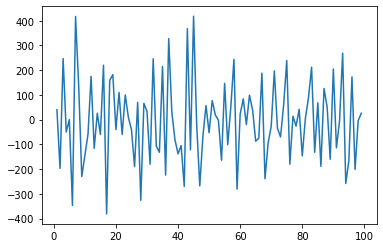

In [3]:
#1차분 차분 데이터
diff1 = df['x'].diff(periods=1).iloc[1:]
diff1.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1 = np.log(df['x']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-4.748414786012466, 6.818878743916928e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -64.46023083112888)
ADF Statistic: -4.748415
p-value: 0.000068


In [5]:
from pmdarima.arima import auto_arima
model = auto_arima(df, suppress_warnings=True)
model

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
#학습용,검증용 구분
n = int(df.shape[0]*.8)
train =df[:n]
test = df[n:]
print(len(df['x']))
print(train['x'].values)
print(test['x'].values)

100
[1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994
 1020  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100
  774  840  874  694  940  833  701  916  692 1020 1050  969  831  726
  456  824  702 1120 1100  832  764  821  768  845  864  862  698  845
  744  796 1040  759  781  865  845  944  984  897  822 1010  771  676
  649  846  812  742  801 1040  860  874  848  890]
[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]


In [7]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(1,1,1)).fit()

In [8]:
#예측값

fore = model.forecast(steps=5)
print(fore)

(array([801.85112416, 769.07297498, 755.14011987, 747.62121544,
       742.28528373]), array([139.36936824, 147.22509374, 148.1097803 , 148.21247435,
       148.22455581]), array([[ 528.69218187, 1075.01006645],
       [ 480.51709362, 1057.62885634],
       [ 464.85028472, 1045.42995503],
       [ 457.13010366, 1038.11232722],
       [ 451.77049272, 1032.80007475]]))


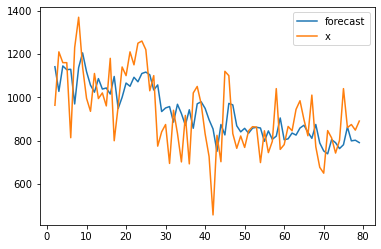

In [10]:
import matplotlib.pyplot as plt

#실제값과 예측값
model.plot_predict()
plt.show()

[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]
[801.85112416 769.07297498 755.14011987 747.62121544 742.28528373
 737.69232156 733.35222729 729.09819601 724.87345606 720.65868533
 716.44730762 712.2370847  708.02725482 703.81755871 699.60790813
 695.39827304 691.18864322 686.9790152  682.76938779 678.55976059]


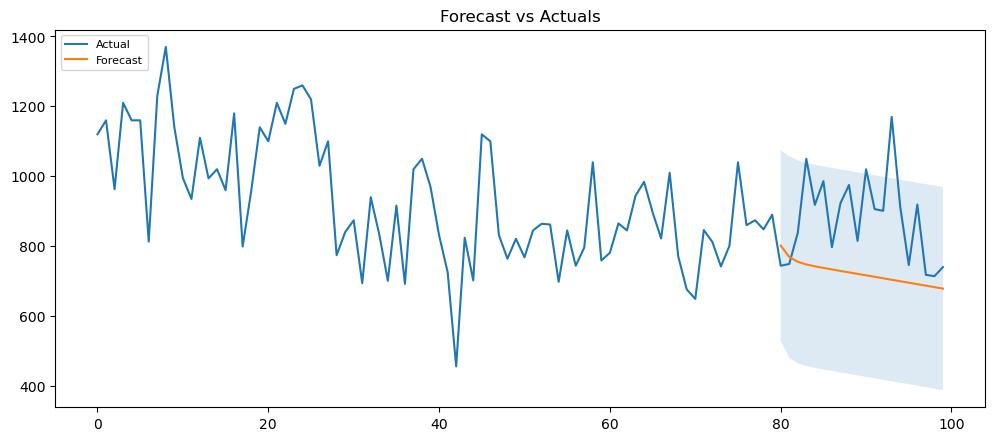

In [11]:
#예측값
fc, se, conf = model.forecast(steps=len(test))
print(test['x'].values)
print(fc)
fc_sereies = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:, 0], index=test.index)
upper = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Actual')
plt.plot(fc_sereies, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()